In [41]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import outliers_influence

# this allows plots to appear directly in the notebook
%matplotlib inline

data = pd.read_csv('Boston.csv', delimiter=",")

predictors = data.columns
Y = 'CRIM'
predictors = filter(lambda z: z != Y, predictors)


#Get the variance inflation factor
for p in predictors:
    formu  = str(p) + " ~ "
    pp = filter(lambda z: z != p, predictors)         
    for l in range(len(pp) - 1):
        formu += str(pp[l]) + " + "
    formu = formu + str(pp[l+1])    
    # create a fitted model in one line
    rsquared = smf.ols(formula=formu, data=data).fit().rsquared
    vif      = 1.0/(1.0 - rsquared)
   
    print("Predictor " + str(p) + " VIF " + str(vif)) 
    

Predictor ZN VIF 2.32509414201
Predictor INDUS VIF 3.98775261291
Predictor CHAS VIF 1.09432642056
Predictor NOX VIF 4.55156308695
Predictor RM VIF 2.25811335619
Predictor AGE VIF 3.10080148585
Predictor DIS VIF 4.28904050513
Predictor RAD VIF 7.1588341897
Predictor TAX VIF 9.19549498173
Predictor PT VIF 1.98448949871
Predictor B VIF 1.36974071439
Predictor LSTAT VIF 3.56147604631
Predictor MV VIF 3.77285632203


In [43]:
#Fit a model with all varaibles
# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS) + NOX + RM + AGE + DIS + RAD + TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           1.57e-56
Time:                        23:54:44   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       17.0332      7.235      2.354      0.019         2.818    31.248
C(CHAS)[T.1]    -0.7491      1.180     -0.635      0.526        -3.068     1.570
ZN               0.0449      0.019      2.394      0.017         0.008     0.082
INDUS           -0.0639      0.083     -0.766      0.444        -0.228     0.100
NOX            -10.3135      5.276     -1.955      0.051       -20.679     0.052
RM               0.4301      0.613      0.702      0.483        -0.774     1.634
AGE              0.0015      0.018      0.081      0.935        -0.034     0.037
DIS             -0.9872      0.282     -3.503      0.001        -1.541    -0.433
RAD              0.5882      0.088      6.680      0.000         0.415     0.761
TAX             -0.0038      0.005     -0.733      0.464        -0.014     0.006
PT              -0.2711      0.186     -1.454      0.147        -0.637     0.095
B               -0.0075      0.004     -2.052      0.041        -0.015    -0.000
LSTAT            0.1262      0.076      1.667      0.096        -0.023     0.275
MV              -0.1989      0.061     -3.287      0.001        -0.318    -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#RAD and tax exhibit multicollineratiry. It turns out they are collinear with each other from the following correlation matrix
#Remove NOX as it's moderately correlated.

#Taking only one
#Fit a model with all varaibles
# create a fitted model in one line
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS)  + RM + AGE + DIS +  TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     30.39
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           7.37e-49
Time:                        23:57:30   Log-Likelihood:                -1675.6
No. Observations:                 506   AIC:                             3375.
Df Residuals:                     494   BIC:                             3426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.4570      5.978     -0.244      0.808       -13.203    10.289
C(CHAS)[T.1]    -0.2719      1.224     -0.222      0.824        -2.677     2.133
ZN               0.0319      0.019      1.645      0.101        -0.006     0.070
INDUS           -0.2466      0.081     -3.053      0.002        -0.405    -0.088
RM               0.7487      0.637      1.175      0.241        -0.503     2.001
AGE             -0.0118      0.018     -0.654      0.513        -0.047     0.024
DIS             -0.8965      0.278     -3.221      0.001        -1.443    -0.350
TAX              0.0236      0.003      8.036      0.000         0.018     0.029
PT               0.0722      0.178      0.406      0.685        -0.277     0.421
B               -0.0107      0.004     -2.810      0.005        -0.018    -0.003
LSTAT            0.2007      0.078      2.568      0.011         0.047     0.354
MV              -0.1208      0.061     -1.972      0.049        -0.241    -0.000
==============================================================================
Omnibus:                      647.469   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73292.505
Skew:                           6.316   Prob(JB):                         0.00
Kurtosis:                      60.591   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:

data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [125]:
data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PT', u'B', u'LSTAT', u'MV'],
      dtype='object')

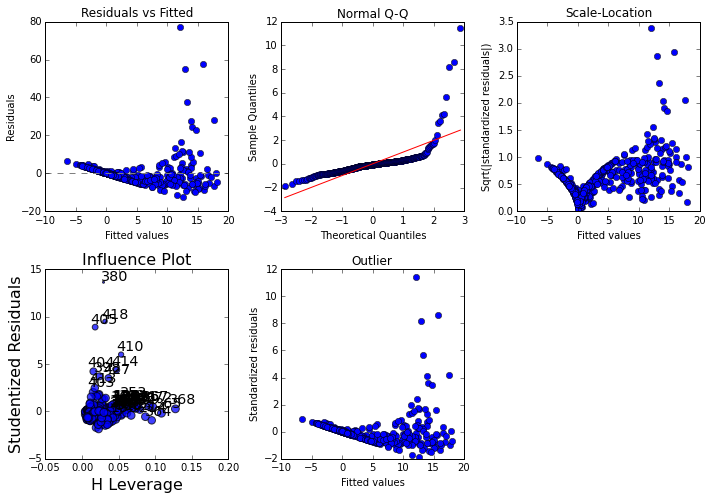

In [46]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [51]:
#Remove outliers to get correct p values.
data = data[abs(results['std_resids']) < 3 ]

data.reset_index(drop=True)

data.shape

(490, 14)

In [53]:
#After removing the outliers; R2 went up; standard error comes down
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS)  + RM + AGE + DIS +  TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     75.52
Date:                Tue, 08 Nov 2016   Prob (F-statistic):           3.84e-97
Time:                        00:03:06   Log-Likelihood:                -1226.0
No. Observations:                 490   AIC:                             2476.
Df Residuals:                     478   BIC:                             2526.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -4.0090      2.714     -1.477      0.140        -9.342     1.324
C(CHAS)[T.1]    -0.2711      0.545     -0.497      0.619        -1.343     0.801
ZN               0.0137      0.009      1.587      0.113        -0.003     0.031
INDUS           -0.1535      0.036     -4.250      0.000        -0.224    -0.082
RM              -0.1293      0.292     -0.442      0.659        -0.704     0.445
AGE             -0.0071      0.008     -0.874      0.382        -0.023     0.009
DIS             -0.4336      0.125     -3.479      0.001        -0.679    -0.189
TAX              0.0195      0.001     14.819      0.000         0.017     0.022
PT               0.0897      0.079      1.132      0.258        -0.066     0.245
B               -0.0053      0.002     -2.849      0.005        -0.009    -0.002
LSTAT            0.2181      0.036      6.041      0.000         0.147     0.289
MV               0.0383      0.028      1.366      0.173        -0.017     0.093
==============================================================================
Omnibus:                      240.237   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2173.448
Skew:                           1.923   Prob(JB):                         0.00
Kurtosis:                      12.574   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

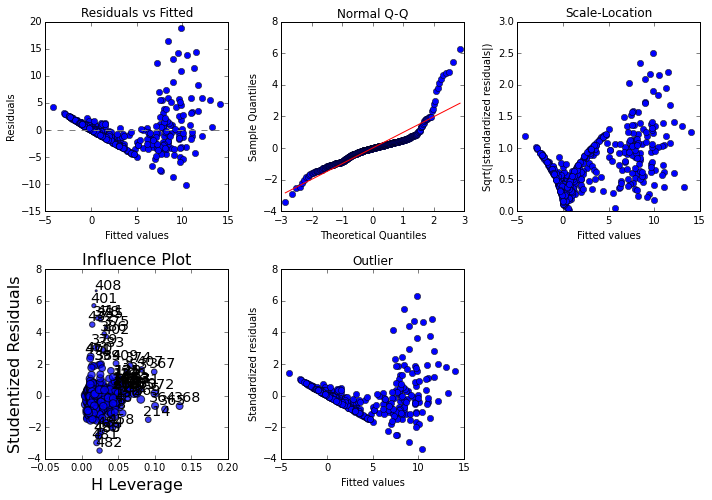

In [54]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [55]:
#Remove even more outliers to get correct p values.
data = data[abs(results['std_resids']) < 3 ]

data.reset_index(drop=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [56]:
#After removing the outliers; R2 went up; standard error comes down
lm = smf.ols(formula='CRIM ~ ZN  + INDUS + C(CHAS)  + RM + AGE + DIS +  TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     103.5
Date:                Tue, 08 Nov 2016   Prob (F-statistic):          9.08e-118
Time:                        00:06:20   Log-Likelihood:                -1047.9
No. Observations:                 480   AIC:                             2120.
Df Residuals:                     468   BIC:                             2170.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -4.7625      1.997     -2.385      0.017        -8.687    -0.838
C(CHAS)[T.1]    -0.1380      0.397     -0.348      0.728        -0.918     0.642
ZN               0.0071      0.006      1.133      0.258        -0.005     0.020
INDUS           -0.0998      0.026     -3.772      0.000        -0.152    -0.048
RM               0.0658      0.219      0.301      0.764        -0.364     0.496
AGE             -0.0057      0.006     -0.969      0.333        -0.017     0.006
DIS             -0.2635      0.091     -2.893      0.004        -0.442    -0.084
TAX              0.0168      0.001     17.325      0.000         0.015     0.019
PT               0.0870      0.058      1.508      0.132        -0.026     0.200
B               -0.0073      0.001     -5.277      0.000        -0.010    -0.005
LSTAT            0.1887      0.027      7.079      0.000         0.136     0.241
MV               0.0480      0.021      2.322      0.021         0.007     0.089
==============================================================================
Omnibus:                      105.737   Durbin-Watson:                   0.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.408
Skew:                           0.917   Prob(JB):                     8.56e-97
Kurtosis:                       7.331   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

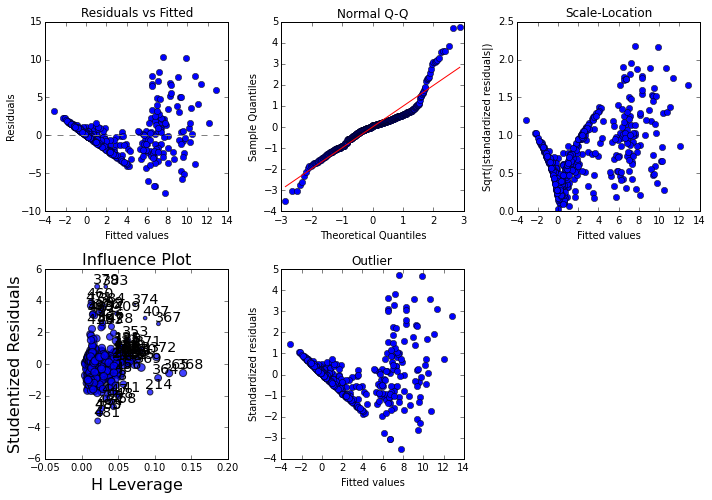

In [57]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [62]:
#Removing non costant varaince
lm = smf.ols(formula='np.log(CRIM) ~ ZN  + INDUS + C(CHAS)  + RM + AGE + DIS +  TAX + PT + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(CRIM)   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     172.5
Date:                Tue, 08 Nov 2016   Prob (F-statistic):          7.86e-157
Time:                        00:09:09   Log-Likelihood:                -626.26
No. Observations:                 480   AIC:                             1277.
Df Residuals:                     468   BIC:                             1327.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -3.6585      0.830     -4.409      0.000        -5.289    -2.028
C(CHAS)[T.1]     0.1792      0.165      1.087      0.278        -0.145     0.503
ZN              -0.0167      0.003     -6.389      0.000        -0.022    -0.012
INDUS            0.0091      0.011      0.828      0.408        -0.012     0.031
RM              -0.0174      0.091     -0.191      0.848        -0.196     0.161
AGE              0.0085      0.002      3.475      0.001         0.004     0.013
DIS             -0.0524      0.038     -1.385      0.167        -0.127     0.022
TAX              0.0072      0.000     17.876      0.000         0.006     0.008
PT              -0.0325      0.024     -1.358      0.175        -0.080     0.015
B               -0.0027      0.001     -4.759      0.000        -0.004    -0.002
LSTAT            0.0504      0.011      4.554      0.000         0.029     0.072
MV               0.0278      0.009      3.237      0.001         0.011     0.045
==============================================================================
Omnibus:                       67.010   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.293
Skew:                          -0.758   Prob(JB):                     2.82e-32
Kurtosis:                       5.229   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

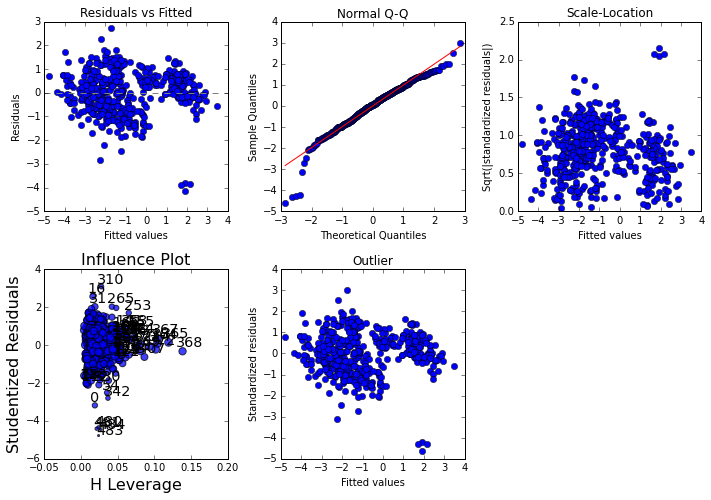

In [63]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()

In [64]:
#Keep only important variables
lm = smf.ols(formula='np.log(CRIM) ~ ZN  +  AGE +  TAX  + B + LSTAT + MV', data=data).fit()

# print the coefficients
lm.rsquared



0.79866363943149854

In [74]:
#Study invididuals for non lineartiy
lm = smf.ols(formula='np.log(CRIM) ~ ZN + np.power(ZN,2) + np.power(ZN, 3)', data=data).fit()

# print the coefficients
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(CRIM)   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     67.77
Date:                Tue, 08 Nov 2016   Prob (F-statistic):           1.67e-36
Time:                        00:17:13   Log-Likelihood:                -929.73
No. Observations:                 480   AIC:                             1867.
Df Residuals:                     476   BIC:                             1884.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.3456      0.090     -3.824      0.000        -0.523    -0.168
ZN                 -0.1081      0.022     -4.874      0.000        -0.152    -0.065
np.power(ZN, 2)     0.0015      0.001      1.912      0.056     -4.08e-05     0.003
np.power(ZN, 3) -7.911e-06   6.32e-06     -1.251      0.211     -2.03e-05  4.51e-06
==============================================================================
Omnibus:                       70.501   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.883
Skew:                           0.136   Prob(JB):                     7.94e-05
Kurtosis:                       2.067   Cond. No.                     1.96e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
'''
#Not useful

#Study invididuals for non lineartiy
lm = smf.ols(formula='np.log(CRIM) ~ MV + np.power(MV,2) + np.power(MV, 3)', data=data).fit()

# print the coefficients
lm.summary()
'''


#Study invididuals for non lineartiy
lm = smf.ols(formula='np.log(CRIM) ~ LSTAT + np.power(LSTAT,2) + np.power(LSTAT, 3)', data=data).fit()

# print the coefficients
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(CRIM)   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     90.35
Date:                Tue, 08 Nov 2016   Prob (F-statistic):           2.74e-46
Time:                        00:19:59   Log-Likelihood:                -906.91
No. Observations:                 480   AIC:                             1822.
Df Residuals:                     476   BIC:                             1839.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -2.5415      0.442     -5.751      0.000        -3.410    -1.673
LSTAT                 -0.0191      0.104     -0.184      0.854        -0.223     0.184
np.power(LSTAT, 2)     0.0163      0.007      2.383      0.018         0.003     0.030
np.power(LSTAT, 3)    -0.0004      0.000     -2.767      0.006        -0.001    -0.000
==============================================================================
Omnibus:                       23.262   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.036
Skew:                           0.355   Prob(JB):                     0.000200
Kurtosis:                       2.411   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#Keep only important variables
lm = smf.ols(formula='np.log(CRIM) ~ ZN  +  AGE +  TAX  + B + LSTAT + MV + np.power(B, 2)', data=data).fit()

# print the coefficients
lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(CRIM)   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     246.2
Date:                Tue, 08 Nov 2016   Prob (F-statistic):          6.44e-163
Time:                        00:23:53   Log-Likelihood:                -620.24
No. Observations:                 480   AIC:                             1258.
Df Residuals:                     471   BIC:                             1296.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept           -5.1715      0.409    -12.657      0.000        -5.974    -4.369
ZN                  -0.0165      0.003     -6.547      0.000        -0.022    -0.012
AGE                  0.0091      0.002      4.085      0.000         0.005     0.014
TAX                  0.0072      0.000     22.567      0.000         0.007     0.008
B                    0.0085      0.003      3.191      0.002         0.003     0.014
LSTAT                0.0543      0.010      5.234      0.000         0.034     0.075
MV                   0.0321      0.007      4.535      0.000         0.018     0.046
np.power(B, 2)   -2.505e-05   5.77e-06     -4.343      0.000     -3.64e-05 -1.37e-05
np.power(DIS, 2)    -0.0042      0.003     -1.354      0.177        -0.010     0.002
==============================================================================
Omnibus:                       63.609   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.816
Skew:                          -0.738   Prob(JB):                     2.38e-29
Kurtosis:                       5.100   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

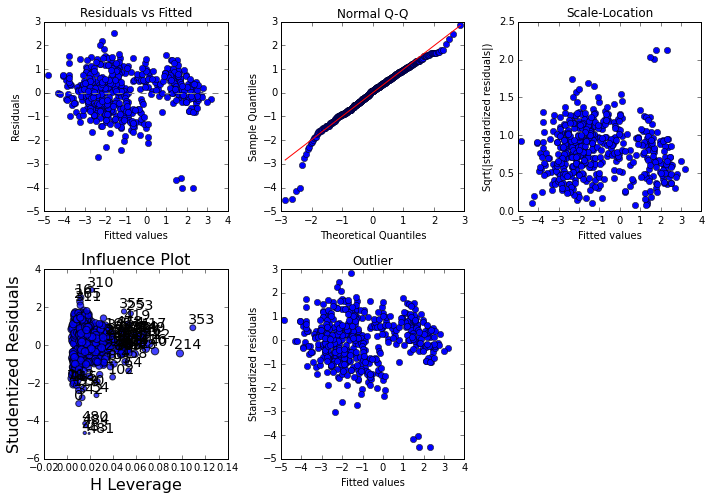

In [87]:
## put residuals (raw & standardized) plus fitted values into a data frame
results = pd.DataFrame({
'resids': lm.resid,
'std_resids': lm.resid_pearson,
'fitted': lm.predict()})


# 4 plots in one window
fig = plt.figure(figsize = (10, 10), dpi = 100)

ax1 = fig.add_subplot(3, 3, 1)
ax1.plot(results['fitted'], results['resids'], 'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

ax2 = fig.add_subplot(3, 3, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')

ax3 = fig.add_subplot(3, 3, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5, 'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')

ax4 = fig.add_subplot(3, 3, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size = 2, ax = ax4)

ax5 = fig.add_subplot(3, 3, 5)
ax5.plot(results['fitted'], results['std_resids'], 'o')
ax5.set_title('Outlier')
ax5.set_xlabel('Fitted values')
ax5.set_ylabel('Standardized residuals')

plt.tight_layout()